# NLTK Basics Part 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
%matplotlib inline 
plt.style.use('ggplot')

## 2.1 Using WordNet in Text Engineering

### Senses and Synonyms

WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. <BR>NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. <BR>We'll begin by looking at synonyms and how they are accessed in WordNet.
Consider the following two sentences:
1. Benz is credited with the invention of the motorcar.
2. Benz is credited with the invention of the automobile.
<BR>


From sentence 1 to 2, we change only one word (motorcar --> automobile), and the meaning of the sentences stays same. <BR>
Since everything else in the sentence has remained unchanged, we can conclude that the words *motorcar* and *automobile* have the same meaning, i.e. they are <b>synonyms</b>. We can explore these words with the help of WordNet:

In [3]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, *motorcar* has just one possible meaning and it is identified as *car.n.01*, the first noun sense of *car*. The entity *car.n.01* is called a <b>synset</b>, or "synonym set", a collection of synonymous words (or "<b>lemmas</b>"):
 --> Lemmatization is a crucial step in text mining.

In [4]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. 

In [5]:
 wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [6]:
# Logical Approach to check if words W1 and W2 are synonym

# Step 1 : Read synsets from wordnet of w1  -> Return a list 
# Step 2 : Get the lemma, definitions, examples -> Return as list of words
# Step 3 : If w2 in [words]
# Step 4 : Return W1.S1, W2


Synsets also come with a prose definition and some example sentences:

In [7]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on. This pairing of a synset with a word is called a lemma. <BR>We can get all the lemmas for a given synset:

In [8]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

Look up a particular lemma：

In [9]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

Get the synset corresponding to a lemma:

In [10]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

Get the "name" of a lemma

In [11]:
wn.lemma('car.n.01.automobile').name()

'automobile'

Unlike the word *motorcar*, which is unambiguous and has one synset, the word *car* is ambiguous, having five synsets:

In [12]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

Now let us look at all the synonyms of *car* in all senses:

In [13]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


### WordNet Hierarchy

WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. Some concepts are very general, such as *Entity, State, Event* — these are called <b>unique beginners</b> or root synsets. Others, such as *gas guzzler* and *hatchback*, are much more specific. <BR>A small portion of a concept hierarchy is illustrated below:<BR>
*Nodes* correspond to synsets; edges indicate the hypernym/hyponym relation, i.e. the relation between superordinate and subordinate concepts.

<img src = 'http://www.nltk.org/images/wordnet-hierarchy.png' alt = "WordNet Hierarchy" style = "height: 50%; width: 50%" align = 'center'/>

# WordNet makes it easy to navigate between concepts. <BR>
For example, given a concept like *motorcar*, we can look at the concepts that are more specific; the (immediate) <b>hyponyms</b>.

In [14]:
# Having a tree like structure in wordnet is very useful to restrict the search tier wise.
# Hypernyms : Parent Nodes
# Hyponyms : Children Nodes


motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
#types_of_motorcar[0]
for synset in types_of_motorcar:
    print (synset) 

Synset('ambulance.n.01')
Synset('beach_wagon.n.01')
Synset('bus.n.04')
Synset('cab.n.03')
Synset('compact.n.03')
Synset('convertible.n.01')
Synset('coupe.n.01')
Synset('cruiser.n.01')
Synset('electric.n.01')
Synset('gas_guzzler.n.01')
Synset('hardtop.n.01')
Synset('hatchback.n.01')
Synset('horseless_carriage.n.01')
Synset('hot_rod.n.01')
Synset('jeep.n.01')
Synset('limousine.n.01')
Synset('loaner.n.02')
Synset('minicar.n.01')
Synset('minivan.n.01')
Synset('model_t.n.01')
Synset('pace_car.n.01')
Synset('racer.n.02')
Synset('roadster.n.01')
Synset('sedan.n.01')
Synset('sport_utility.n.01')
Synset('sports_car.n.01')
Synset('stanley_steamer.n.01')
Synset('stock_car.n.01')
Synset('subcompact.n.01')
Synset('touring_car.n.01')
Synset('used-car.n.01')


In [15]:
# Now how many types of cars we know?
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

We can also navigate up the hierarchy by visiting hypernyms. Some words have multiple paths, because they can be classified in more than one way. There are two paths between *car.n.01* and *entity.n.01* because *wheeled_vehicle.n.01* can be classified as both a vehicle and a container.

In [16]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [17]:
paths = motorcar.hypernym_paths()
len(paths)

2

So now we know there are two paths linking <b> Entity </b> and <b> Car </b>. What are they then?

In [18]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

Here is the other path:

In [19]:
[synset.name() for synset in paths[1]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

We can get the most general <b>hypernyms</b> (or root hypernyms) of a synset as follows:

In [20]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

## YOUR TURN HERE

Try out NLTK's convenient graphical WordNet browser: nltk.app.wordnet(). Explore the WordNet hierarchy by following the hypernym and hyponym links.

In [21]:
# call nltk.app.wordnet() here
#nltk.app.wordnet()
#http://www.nltk.org/howto/wordnet.html

## 2.2 Preprocessing Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections to explore, such as the corpora we saw in the previous chapters. However, you probably have your own text sources in mind, and need to learn how to access them. <BR>

The goal of this chapter is to answer the following questions:<BR>

<ol> How can we write programs to access text from local files and from the web, in order to get hold of an unlimited range of language material?</ol>
<ol>How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?</ol>
<ol>How can we write programs to produce formatted output and save it in a file?</ol>
In order to address these questions, we will be covering key concepts in NLP, including tokenization and stemming.<BR> Along the way you will consolidate your Python knowledge and learn about strings, files, and regular expressions. Since so much text on the web is in HTML format, we will also see how to dispense with markup.



In [22]:
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize

### The NLP Pipeline

Following diagram summarizes what we have covered in this section, including the process of building a vocabulary that we saw in Part 1.

<img src='http://www.nltk.org/images/pipeline1.png' alt='The NLP Pipeline' style='height；75%; width: 75%'/>

There's a lot going on in this pipeline. To understand it properly, it helps to be clear about the type of each variable that it mentions. We find out the type of any Python object x using type(x), e.g. type(1) is “int” since 1 is an integer. <BR>
When we load the contents of a URL or file, and when we strip out HTML markup, we are dealing with strings, Python's *String* data type.

### Regular Expressions for Detecting Word Patterns

Many linguistic processing tasks involve pattern matching. For example, we can find words ending with ed using endswith('ed').  Regular expressions give us a more powerful and flexible method for describing the character patterns we are interested in. <BR>
<B> NOTE: </B>
There are many other published introductions to regular expressions, organized around the syntax of regular expressions and applied to searching text files. Instead of doing this again, we focus on the use of regular expressions at different stages of linguistic processing. As usual, we'll adopt a problem-based approach and present new features only as they are needed to solve practical problems. In our discussion we will mark regular expressions using chevrons like this: «patt».<BR>
To use regular expressions in Python we need to import the re library using: *import re*. We also need a list of words to search; we'll use the Words Corpus again. We will preprocess it to remove any proper names.

In [23]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

#### Using Basic Meta-Characters

Let's find words ending with ed using the regular expression «ed$». We will use the *re.search(p, s)* function to check whether the pattern <b> p </b> can be found somewhere inside the string <b>s</b>. We need to specify the characters of interest, and use the *dollar sign* which has a special behavior in the context of regular expressions in that it matches the end of the word:

In [24]:
[w for w in wordlist if re.search('ed$', w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

The . <b>wildcard </b> symbol matches any single character. Suppose we have room in a crossword puzzle for an 8-letter word with j as its third letter and t as its sixth letter. In place of each blank cell we use a period:

In [25]:
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

### YOUR TURN HERE

The caret symbol ^ matches the start of a string, just like the $ matches the end. What results do we get with the above example if we leave out both of these, and search for «..j..t..»?

In [26]:
### Your Code Here
[w for w in wordlist if re.search('..j..t..', w)]

['abjectedness',
 'abjection',
 'abjective',
 'abjectly',
 'abjectness',
 'adjection',
 'adjectional',
 'adjectival',
 'adjectivally',
 'adjective',
 'adjectively',
 'adjectivism',
 'adjectivitis',
 'adjustable',
 'adjustably',
 'adjustage',
 'adjustation',
 'adjuster',
 'adjustive',
 'adjustment',
 'antejentacular',
 'antiprojectivity',
 'bijouterie',
 'coadjustment',
 'cojusticiar',
 'conjective',
 'conjecturable',
 'conjecturably',
 'conjectural',
 'conjecturalist',
 'conjecturality',
 'conjecturally',
 'conjecture',
 'conjecturer',
 'coprojector',
 'counterobjection',
 'dejected',
 'dejectedly',
 'dejectedness',
 'dejectile',
 'dejection',
 'dejectly',
 'dejectory',
 'dejecture',
 'disjection',
 'guanajuatite',
 'inadjustability',
 'inadjustable',
 'injectable',
 'injection',
 'injector',
 'injustice',
 'insubjection',
 'interjection',
 'interjectional',
 'interjectionalize',
 'interjectionally',
 'interjectionary',
 'interjectionize',
 'interjectiveness',
 'interjector',
 'interje

#### Ranges and Closures

The T9 system is used for entering text on mobile phones . Two or more words that are entered with the same sequence of keystrokes are known as textonyms. For example, both hole and golf are entered by pressing the sequence 4653. What other words could be produced with the same sequence? Here we use the regular expression «^[ghi][mno][jlk][def]$»:

<img src='http://www.nltk.org/images/T9.png' alt='T9'style = 'height:50%; width: 50%'/>

In [27]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

The first part of the expression, «^[ghi]», matches the start of a word followed by g, h, or i. The next part of the expression, «[mno]», constrains the second character to be m, n, or o. The third and fourth characters are also constrained. Only four words satisfy all these constraints. Note that the order of characters inside the square brackets is not significant, so we could have written «^[hig][nom][ljk][fed]$» and matched the same words.

### YOUR TURN HERE

Look for some "finger-twisters", by searching for words that only use part of the number-pad. For example,  "^[ghijklmno]+$", or more concisely, "^[g-o]+$", will match words that only use keys 4, 5, 6 in the center row, and «^[a-fj-o]+$» will match words that use keys 2, 3, 5, 6 in the top-right corner. What do - and + mean?

In [28]:
#### YOUR CODE HERE
[w for w in wordlist if re.search('^[g-o]+', w)]

['g',
 'ga',
 'gab',
 'gabardine',
 'gabbard',
 'gabber',
 'gabble',
 'gabblement',
 'gabbler',
 'gabbro',
 'gabbroic',
 'gabbroid',
 'gabbroitic',
 'gabby',
 'gabelle',
 'gabelled',
 'gabelleman',
 'gabeller',
 'gaberdine',
 'gaberlunzie',
 'gabgab',
 'gabi',
 'gabion',
 'gabionade',
 'gabionage',
 'gabioned',
 'gablatores',
 'gable',
 'gableboard',
 'gablelike',
 'gablet',
 'gablewise',
 'gablock',
 'gaby',
 'gad',
 'gadabout',
 'gadbee',
 'gadbush',
 'gadded',
 'gadder',
 'gaddi',
 'gadding',
 'gaddingly',
 'gaddish',
 'gaddishness',
 'gade',
 'gadfly',
 'gadge',
 'gadger',
 'gadget',
 'gadid',
 'gadinine',
 'gadling',
 'gadman',
 'gadoid',
 'gadolinia',
 'gadolinic',
 'gadolinite',
 'gadolinium',
 'gadroon',
 'gadroonage',
 'gadsman',
 'gaduin',
 'gadwall',
 'gaen',
 'gaet',
 'gaff',
 'gaffe',
 'gaffer',
 'gaffle',
 'gaffsman',
 'gag',
 'gagate',
 'gage',
 'gageable',
 'gagee',
 'gageite',
 'gagelike',
 'gager',
 'gagership',
 'gagger',
 'gaggery',
 'gaggle',
 'gaggler',
 'gagman',

Let's explore the + symbol a bit further. Notice that it can be applied to individual letters, or to bracketed sets of letters:

In [29]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

# Search using *

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [30]:
[w for w in chat_words if re.search('^[ha]+$', w)]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

It should be clear that + simply means "one or more instances of the preceding item", which could be an individual character like m, a set like [fed] or a range like [d-f]. Now let's replace + with *, which means "zero or more instances of the preceding item". The regular expression «^m*i*n*e*$» will match everything that we found using «^m+i+n+e+$», but also words where some of the letters don't appear at all, e.g. me, min, and mmmmm. Note that the + and * symbols are sometimes referred to as Kleene closures, or simply closures. <BR>
The ^ operator has another function when it appears as the first character inside square brackets. For example «[^aeiouAEIOU]» matches any character other than a vowel. We can search the NPS Chat Corpus for words that are made up entirely of non-vowel characters using «^[^aeiouAEIOU]+$» to find items like these: :):):), grrr, cyb3r and zzzzzzzz. Notice this includes non-alphabetic characters.

Here are some more examples of regular expressions being used to find tokens that match a particular pattern, illustrating the use of some new symbols: \, {}, (), and |:

In [31]:
wsj = sorted(set(nltk.corpus.treebank.words()))
# if we want to search for all numbers in the corpus
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]  #{\. escaping the special charcter}

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7',
 '0.82',
 '0.84',
 '0.9',
 '0.95',
 '0.99',
 '1.01',
 '1.1',
 '1.125',
 '1.14',
 '1.1650',
 '1.17',
 '1.18',
 '1.19',
 '1.2',
 '1.20',
 '1.24',
 '1.25',
 '1.26',
 '1.28',
 '1.35',
 '1.39',
 '1.4',
 '1.457',
 '1.46',
 '1.49',
 '1.5',
 '1.50',
 '1.55',
 '1.56',
 '1.5755',
 '1.5805',
 '1.6',
 '1.61',
 '1.637',
 '1.64',
 '1.65',
 '1.7',
 '1.75',
 '1.76',
 '1.8',
 '1.82',
 '1.8415',
 '1.85',
 '1.8500',
 '1.9',
 '1.916',
 '1.92',
 '10.19',
 '10.2',
 '10.5',
 '107.03',
 '107.9',
 '109.73',
 '11.10',
 '11.5',
 '11.57',
 '11.6',
 '11.72',
 '11.95',
 '112.9',
 '113.2',
 '116.3',
 '116.4',
 '116.7',
 '116.9',
 '118.6',
 '12.09',
 '12.5',
 '12.52',
 '12.68',
 '12.7',
 '12.82',
 '12.97',
 '120.7',
 '1206.26',
 '121.6',
 '126.1',
 '126.15',
 '127.03',
 '129.91',
 '13.1',
 '13.15',
 '13.5',
 '13.50',
 '13.625',
 '13.65',
 '13.73',
 '13.8',
 '13.90',
 '130.6',
 '130.7',
 '

In [32]:
# if we want to search for all srtring ends with $
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

In [33]:
# if we want to search for any 4-digit numbers
[w for w in wsj if re.search('^[0-9]{4}$', w)]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934',
 '1948',
 '1953',
 '1955',
 '1956',
 '1961',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1976',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2005',
 '2009',
 '2017',
 '2019',
 '2029',
 '3057',
 '8300']

In [34]:
[w for w in wsj if re.search('^(19|20)[0-9]{2}$', w)]

['1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934',
 '1948',
 '1953',
 '1955',
 '1956',
 '1961',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1976',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2005',
 '2009',
 '2017',
 '2019',
 '2029']

In [35]:
#### put your comment here - what does this search for?
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point',
 '20-point',
 '20-stock',
 '21-month',
 '237-seat',
 '240-page',
 '27-year',
 '30-day',
 '30-point',
 '30-share',
 '30-year',
 '300-day',
 '36-day',
 '36-store',
 '42-year',
 '50-state',
 '500-stock',
 '52-week',
 '69-point',
 '84-month',
 '87-store',
 '90-day']

In [36]:
#### put your comment here - what does this search for?
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [37]:
#### put your comment here - what does this search for?
[w for w in wsj if re.search('(ed|ing)$', w)]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything',
 'Arbitrage-related',
 'Arbitraging',
 'Asked',
 'Assuming',
 'Atlanta-based',
 'Baking',
 'Banking',
 'Beginning',
 'Beijing',
 'Being',
 'Bermuda-based',
 'Betting',
 'Boeing',
 'Broadcasting',
 'Bucking',
 'Buying',
 'Calif.-based',
 'Change-ringing',
 'Citing',
 'Concerned',
 'Confronted',
 'Conn.based',
 'Consolidated',
 'Continued',
 'Continuing',
 'Declining',
 'Defending',
 'Depending',
 'Designated',
 'Determining',
 'Developed',
 'Died',
 'During',
 'Encouraged',
 'Encouraging',
 'English-speaking',
 'Estimated',
 'Everything',
 'Excluding',
 'Exxon-owned',
 'Faulding',
 'Fed',
 'Feeding',
 'Filling',
 'Filmed',
 'Financing',
 'Following',
 'Founded',
 'Fracturing',
 'Francisco-based',
 'Fred',
 'Funded',
 'Funding',
 'Generalized',
 'Germany-based',
 'Getting',
 'Guaranteed',
 'Having',
 'Heating',
 'Heightened',
 'Holding',
 'Housing',
 'Illumin

### YOUR TURN HERE

Study the above examples and try to work out what the \, {}, (), and | notations mean before you read on.
<B> YOUR NOTES HERE: </b>

In [114]:
#double click to mark your notes

# [] - 
# {} - 
# + -
# - -
# any legal IP address
# https://developers.google.com/edu/python/regular-expressions


Ipaddr = ["192.0.0.1","91.0.56.255","255.255.255.0","000.000.000.132","192.168.1.1"]

# Regular expression for detecting valid IP address
[w for w in Ipaddr if re.search("^(([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.){3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])$",w)] # \.[0-255]{,3}\.[0-255]{,3}\.[0-255]{,3}$',w)] #-[0-9]{3,}$', w)]

['192.0.0.1', '91.0.56.255', '255.255.255.0', '192.168.1.1']

### Other RegEx Applications

The above examples all involved searching for words w that match some regular expression regexp using re.search(regexp, w). Apart from checking if a regular expression matches a word, we can use regular expressions to extract material from words, or to modify words in specific ways.


#### Extracting Word Pieces

The re.findall() ("find all") method finds all (non-overlapping) matches of the given regular expression. Let's find all the vowels in a word, then count them:

In [115]:
word = 'supercalifragilisticexpialidocious'

Where did this word come from? Please view the following video:

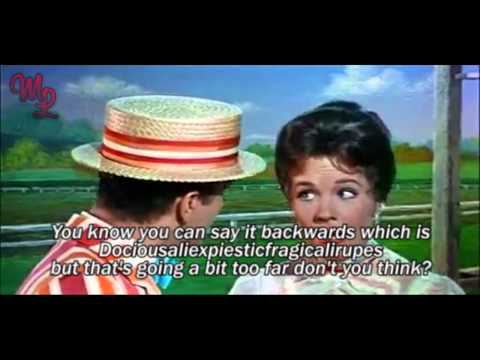

In [116]:
from IPython.display import YouTubeVideo
YouTubeVideo('uZNRzc3hWvE')
# Supercalifragilisticexpialidocious (from "Mary Poppins") - Julie Andrews, Dick Van Dyke

In [117]:
# let us find all vowels in this ridiculously long word
print(re.findall(r'[aeiou]', word))
print(len(re.findall(r'[aeiou]', word)))
#print(re.findall(r'[super]', word))
# 16 vowels - what a ridiculously long word!

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']
16


Let's exercise a more normal example by looking for all sequences of two or more vowels in some text, and determine their relative frequency:

In [118]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                   for vs in re.findall(r'[aeiou]{3,}', word))
fd.most_common(12)

[('iou', 27),
 ('eau', 10),
 ('oui', 6),
 ('eou', 5),
 ('uou', 5),
 ('uee', 4),
 ('ieu', 3),
 ('uie', 3),
 ('eei', 2),
 ('iai', 1),
 ('oei', 1),
 ('aii', 1)]

#### Doing More with Word Pieces

Once we can use re.findall() to extract material from words, there's interesting things to do with the pieces, like glue them back together or plot them.

It is sometimes noted that English text is highly redundant, and it is still easy to read when word-internal vowels are left out. For example, declaration becomes dclrtn, and inalienable becomes inlnble, retaining any initial or final vowel sequences. The regular expression in our next example matches initial vowel sequences, final vowel sequences, and all consonants; everything else is ignored. This three-way disjunction is processed left-to-right, if one of the three parts matches the word, any later parts of the regular expression are ignored. We use re.findall() to extract all the matching pieces, and ''.join() to join them together.

In [119]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'

# define a function to isolate vowels from English words
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words("English-Latin1")
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

# firstly try with the most distinctive pattern 
# 

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


Next, let's combine regular expressions with conditional frequency distributions. Here we will extract all consonant-vowel sequences from the words of Rotokas, such as ka and si. Since each of these is a pair, it can be used to initialize a conditional frequency distribution. We then tabulate the frequency of each pair:

In [120]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


## Q1.
Define the variable saying to contain the list 
        ['After', 'all', 'is', 'said', 'and', 'done', ',', 'more', 'is', 'said', 'than', 'done', '.']. 

Process this list using a for loop, and store the length of each word, and the word itself in a dictionary. 
###Hint: 
1. begin by assigning the empty list to lengths, using lengths = []. 
2. Then each time through the loop, use append() to add another length value to the list. 
3. Now do the same thing using a list comprehension - and construct a dictionary from it.

In [121]:
#### Code for creating a dictionary with the words and their respective lengths 

# creating a word list with all the words 
words =  ['After', 'all', 'is', 'said', 'and', 'done', ',', 'more', 'is', 'said', 'than', 'done', '.']
# creating an empty list 
lengths = []
# creating a for loop to iterate through the words and generate their lengths and the store them in Lengths using append
for word in words:
    result = len(word)
    lengths.append(result)
print(lengths)

# Creating a dictionary using these two lists , zip function

dictionary = dict(zip(words, lengths))
dictionary


[5, 3, 2, 4, 3, 4, 1, 4, 2, 4, 4, 4, 1]


{',': 1,
 '.': 1,
 'After': 5,
 'all': 3,
 'and': 3,
 'done': 4,
 'is': 2,
 'more': 4,
 'said': 4,
 'than': 4}

## Q2. 
Define a variable **silly** to contain the string:

    'newly formed bland ideas are inexpressible in an infuriating way'. 
    
(This happens to be the legitimate interpretation that bilingual English-Spanish speakers can assign to Chomsky's famous nonsense phrase, *colorless green ideas sleep furiously* according to [Wikipedia](https://en.wikipedia.org/wiki/Colorless_green_ideas_sleep_furiously)). 

Now write code to perform the following tasks:

1. Split silly into a list of strings, one per word, using Python's split() operation, and save this to a variable called **bland**.
2. Extract the *second* letter of each word in **silly** and join them into a string, to get '*eoldrnnnna*'.
3. Combine the words in **bland** back into a single string, using **join()**. Make sure the words in the resulting string are separated with whitespace.
4. Print the words of **silly** in alphabetical order, one per line.

In [122]:
#### Your code here

# Creating a variable Silly for the string 

silly = 'newly formed bland ideas are inexpressible in an infuriating way'
# creating the bland variable with the words individually into a list. 
bland = silly.split()
bland

# extracting the second letter in each word and then storing them into list also joining them at the end
lengths=[]
for word in bland:
    result = word[1]
    lengths.append(result)
    s = ''
    s = s.join(lengths)
print(s)

# Joining the words in the bland back to a single string with whitespace in between 
string = ' '
string = string.join(bland)
print(string)

# Printing the words in silly in an alphabetical order
for word in sorted(silly.split()):
    print (word)



eoldrnnnna
newly formed bland ideas are inexpressible in an infuriating way
an
are
bland
formed
ideas
in
inexpressible
infuriating
newly
way
